# Logistic Regression for MRI image classification

Training School: Kiddee Lab

Teacher: Min Khant Soe

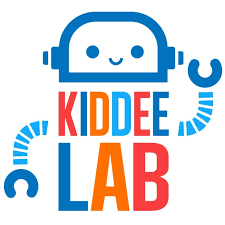

## Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/KiddeeLab_Min_Project_New/Machine_Learning/Dataset/Brain MRI

/content/drive/MyDrive/KiddeeLab_Min_Project_New/Machine_Learning/Dataset/Brain MRI


## Importing Libs

In [3]:
import os

from PIL import Image
from IPython.display import display 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

## Loading Dataset

In [4]:
Image_data = []
Images = []
Label = []

In [5]:
for filename in os.scandir("brain_tumor_dataset/no"):
    if filename.is_file():
        #print(filename.path)
        img = Image.open(filename.path)
        Images.append(img)
        img = img.resize(size=(32,32))
        img = img.convert('L')   #convert to grayscale
        Image_data.append(np.array(img).flatten())
        Label.append(0)

for filename in os.scandir("brain_tumor_dataset/yes"):
    if filename.is_file():
        #print(filename.path)
        img = Image.open(filename.path)
        Images.append(img)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        Image_data.append(np.array(img).flatten())
        Label.append(1)

## Data Exploration

In [6]:
unique_label = np.unique(Label)

print("Number of Images:", len(Image_data))
print("Total Labels:", unique_label)

Number of Images: 253
Total Labels: [0 1]


In [7]:
# How to get unique ids from list without using np.unique
def unique(list1):
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [8]:
unique_label = unique(Label)

print("Number of Images:", len(Image_data))
print("Total Labels:", unique_label)

Number of Images: 253
Total Labels: [0, 1]


Patient has Brain Tumor


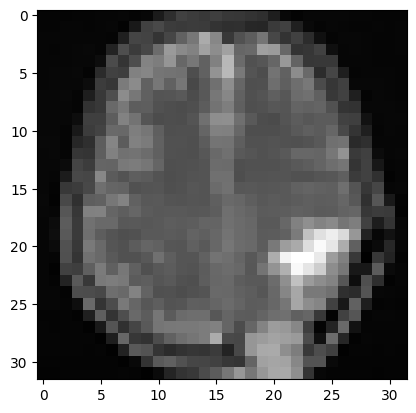

In [9]:
image_num = 150

pic1 = np.reshape(Image_data[image_num], (32, 32))
plt.imshow(pic1, cmap = "gray")   

if Label[image_num] == 0:
  print("Patient does not has Brain Tumor")
else:
  print("Patient has Brain Tumor")

Size of original image: (587, 630)
Size of resized image: (240, 240)


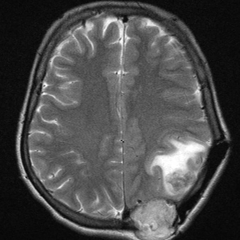

Patient has Brain Tumor


In [10]:
image = Images[image_num]  #image number 0
print("Size of original image:", image.size)
image = image.resize(size=(240,240))
print("Size of resized image:", image.size)
display(image)

if Label[image_num] == 0:
  print("Patient does not has Brain Tumor")
else:
  print("Patient has Brain Tumor")

## Data Prepartion for Model Training

In [11]:
print("Data Type")
print(type(Image_data))
print(type(Label))

Data Type
<class 'list'>
<class 'list'>


In [12]:
X_data = np.array(Image_data)
y_data = np.array(Label)

In [13]:
print("Data Type")
print(type(X_data))
print(type(y_data))

Data Type
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)
print(f"Shape of X train: {X_train.shape} \nShape of y train: {y_train.shape}")
print(f"Shape of X val: {X_val.shape} \nShape of y val:{y_val.shape}")

Shape of X train: (202, 1024) 
Shape of y train: (202,)
Shape of X val: (51, 1024) 
Shape of y val:(51,)


In [15]:
log_reg_model = LogisticRegression(solver='newton-cg', max_iter = 200)
log_reg_model.fit(X_train, y_train)
print("Training Accuracy:", log_reg_model.score(X_train,y_train))

Training Accuracy: 1.0


In [16]:
y_pred = log_reg_model.predict(X_val)
print("In Test Dataset, Total Number of Patients:", len(y_pred))
print("######################################")
print("Number of patients who have Brain Tumor", sum(y_pred!=0))
print("Number of patients who does not have Brain Tumor", sum(y_pred==0))
print("######################################")

In Test Dataset, Total Number of Patients: 51
######################################
Number of patients who have Brain Tumor 31
Number of patients who does not have Brain Tumor 20
######################################


In [17]:
# classification report
print("=========Classification report=======")
print(classification_report(y_val, y_pred)) 
# y_val is the real label
# y_pred is predicted label by Logistic Regression

=========Classification report=======
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        18
           1       0.84      0.79      0.81        33

    accuracy                           0.76        51
   macro avg       0.74      0.76      0.75        51
weighted avg       0.77      0.76      0.77        51

